<a href="https://colab.research.google.com/github/yoonseong00/colab/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

# 이 두 줄의 코드는 matplotlib의 기본 scheme말고, seaborn scheme을 세팅해준다
# 일일이 graph의 font size를 지정할 필요 없이, seaborn의 font_scale을 사용하면 편리하다
plt.style.use('seaborn')
sns.set(font_scale = 2.5)

In [ ]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
pip install kaggle

In [ ]:
df_train=pd.read_csv("/train.csv")
df_test=pd.read_csv("/test.csv")

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

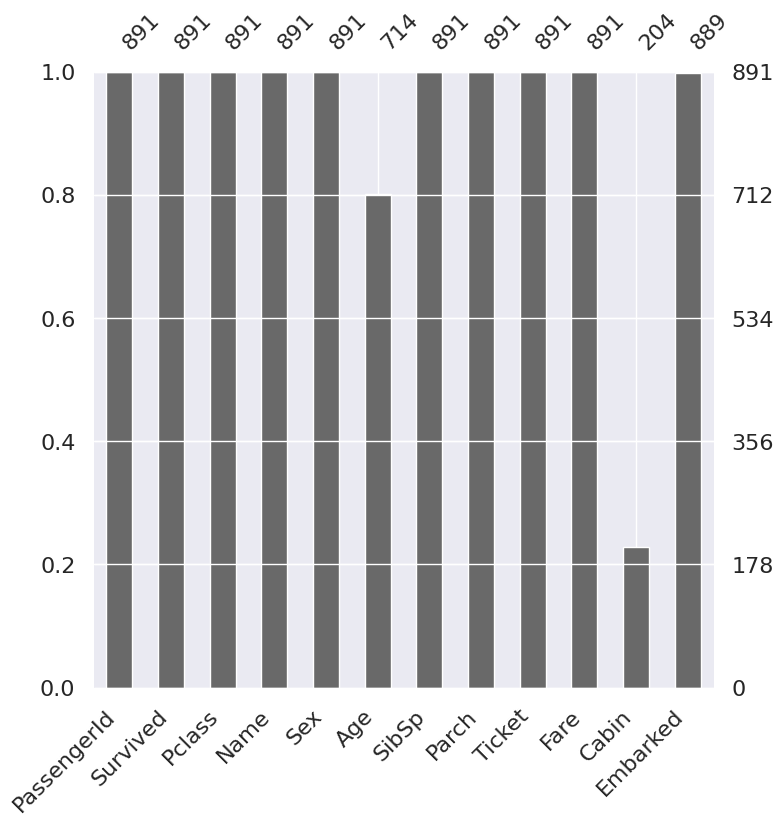

In [ ]:
msno.bar(df = df_train.iloc[:, :], figsize = (8, 8))
# figsize = 가로, 세로 길이

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

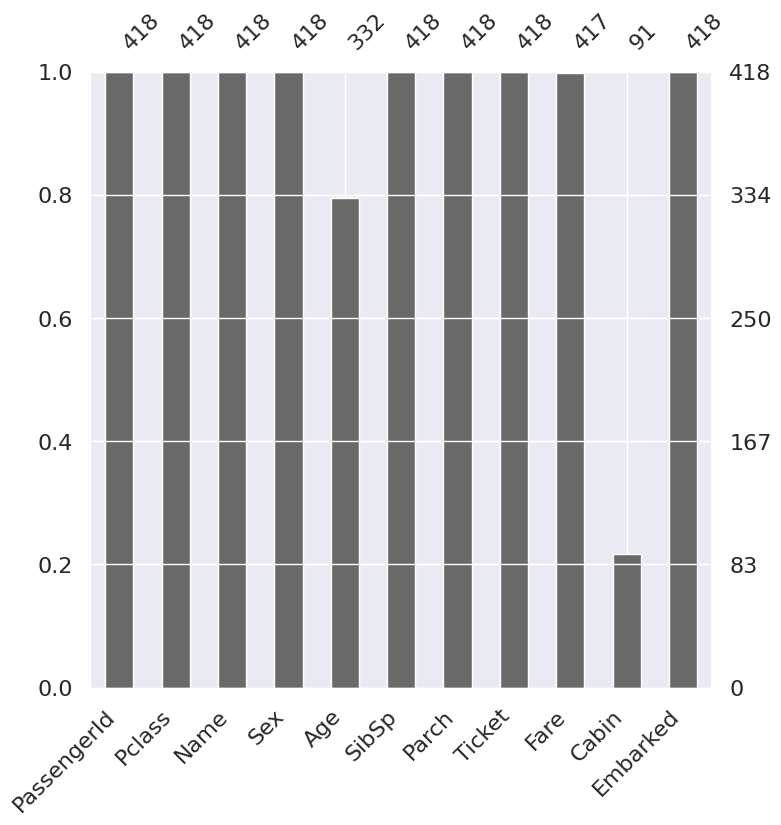

In [ ]:
msno.bar(df = df_test.iloc[:, :], figsize = (8, 8))

# Tartget 변수(Survived)의 분포 확인

In [ ]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Count Plot - Survived')

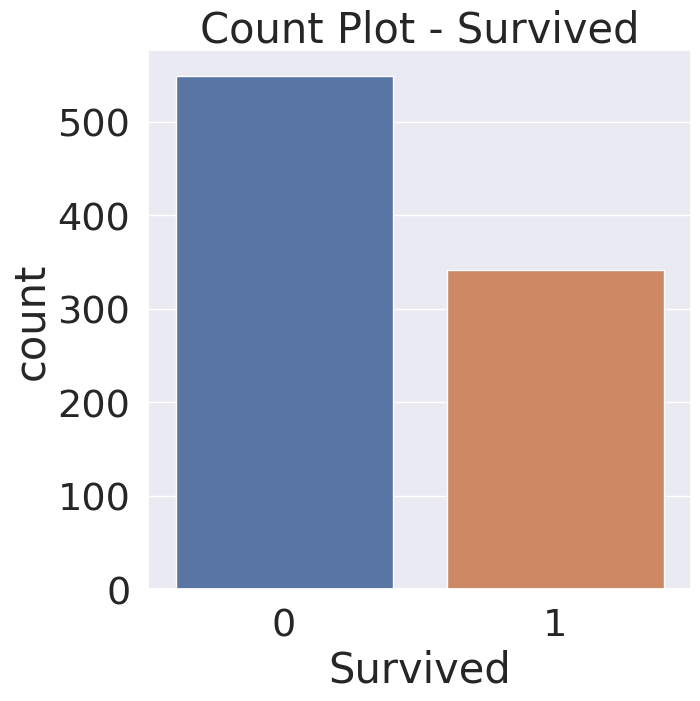

In [ ]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'Survived', data = df_train)
plt.title('Count Plot - Survived')

# 탐색적 데이터 분석(EDA)

## Pclass에 따른 생존률의 차이 확인

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [65]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True)
# Pclass에 따른 생존률에 대한 count와sum을 동시에 보여주는 기능

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [70]:
pclass_mean_survived = df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean()
pclass_mean_survived

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Text(0.5, 1.0, 'Pclass vs Survived')

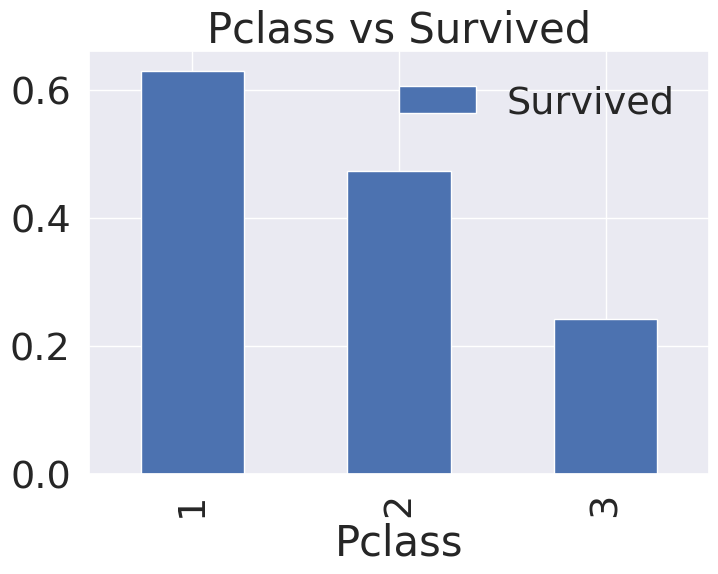

In [71]:
pclass_mean_survived.sort_values(by = 'Survived', ascending = False).plot.bar()
plt.title('Pclass vs Survived')

- Pclass가 높을수록(1st) 생존률이 높은 것을 확인할 수 있다.

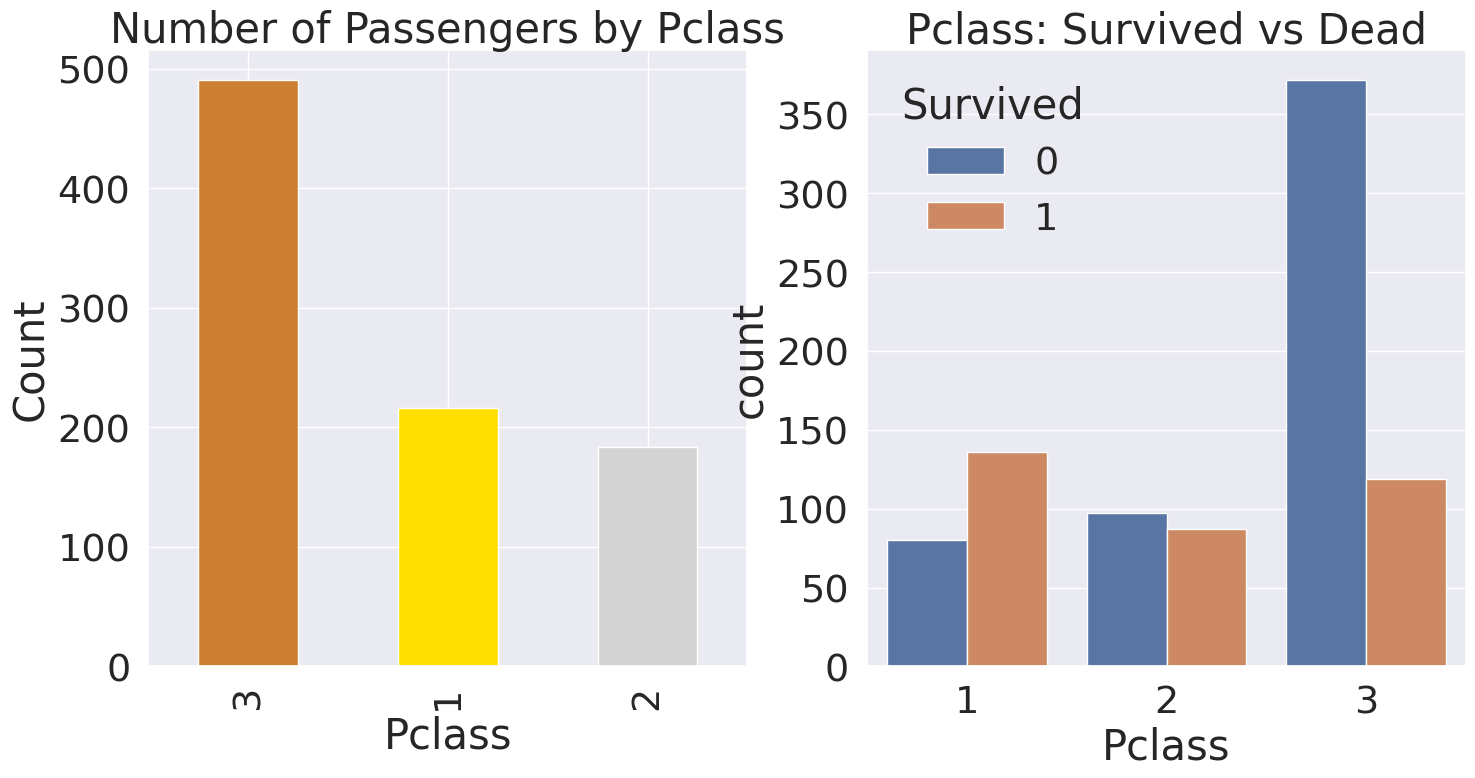

In [76]:
f, ax = plt.subplots(1, 2, figsize = (17, 8))

df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_xlabel('Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x = 'Pclass', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

- Pclass가 3인 탑승객들이 가장 많았고, Pclass가 1인 탑승객들의 생존률이 가장 높다.
- 이러한 결과가 나온 것으로 보아, Pclass 변수는 target 변수를 예측하는데 중요한 feature라고 생각할 수 있겠다.


# Sex에 따른 생존률의 차이 확인

In [79]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).count()

,Survived
Sex,
female,314
male,577


In [81]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).sum()

,Survived
Sex,
female,233
male,109


In [82]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [83]:
sex_mean_survived = df_train[['Sex', 'Survived']].groupby(['Sex'], as_index= True).mean()
sex_mean_survived

,Survived
Sex,
female,0.742038
male,0.188908


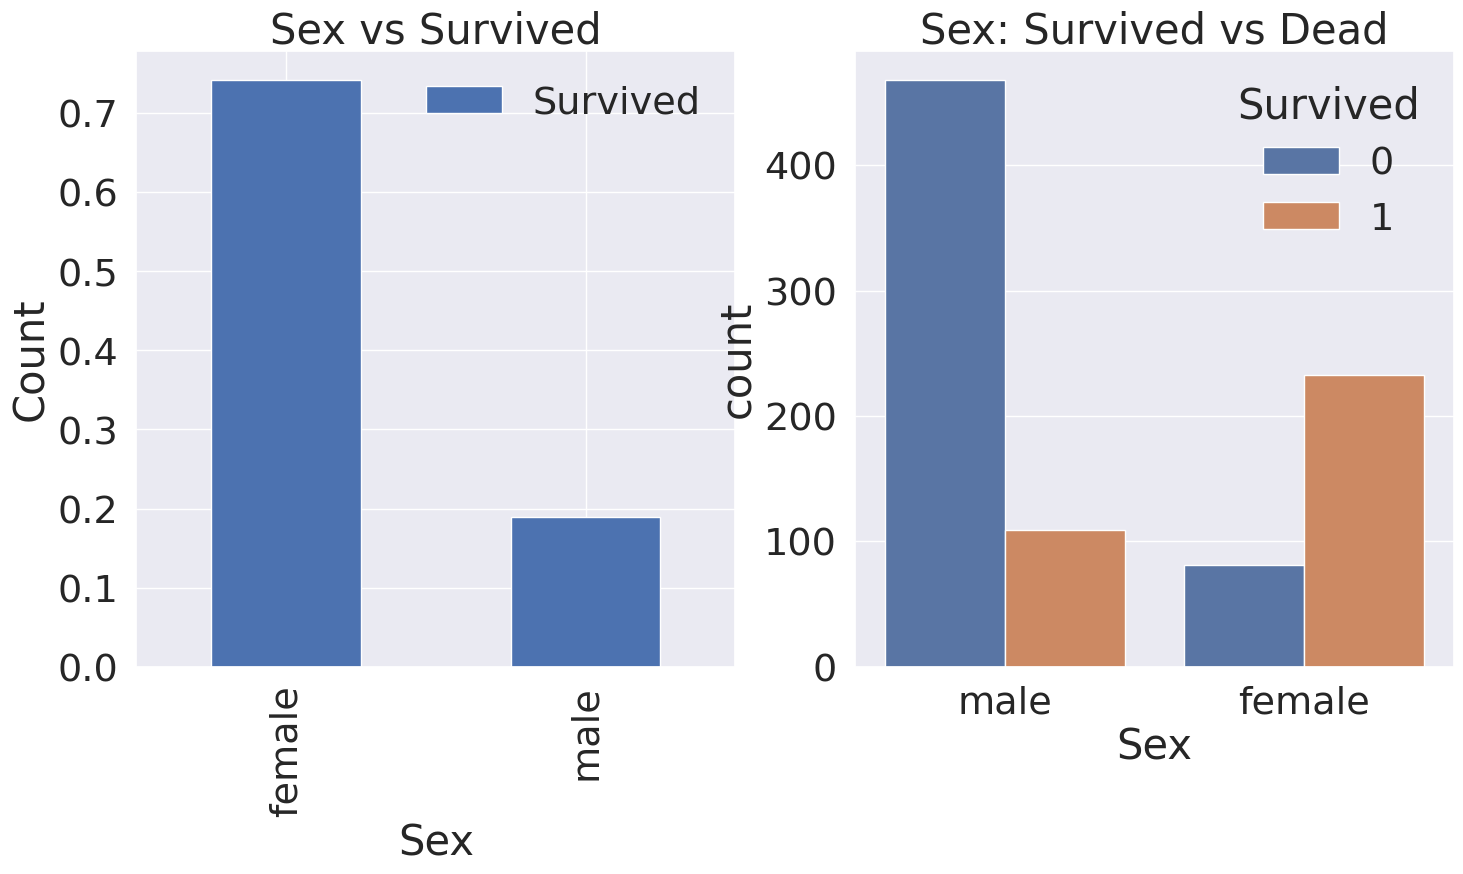

In [85]:
f, ax = plt.subplots(1, 2, figsize = (17, 8))

sex_mean_survived.sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax[0])
ax[0].set_title('Sex vs Survived')
ax[0].set_ylabel('Count')

sns.countplot(x = 'Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

- 남성과 여성의 생존률을 비교해보면, 여성의 생존률이 월등히 높은 것을 확인할 수 있다.
- 그 이유는 사고 발생 당시에 노인, 여성, 어린 아이들을 먼저 구조했기 때문일 것이라고 생각된다.
- 이러한 결과가 나온 것으로 보아, Sex 변수는 target 변수를 예측하는데 중요한 feature라고 생각할 수 있겠다.

# Pclass 및 Sex에 따른 생존률의 차이 확인

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
!pip install seaborn --upgrade

- 버전때문인지는 몰라도 구글링을 했음에도 factorplot이 seaborn 모듈에서 사라짐

# Age에 따른 생존률의 차이 확인

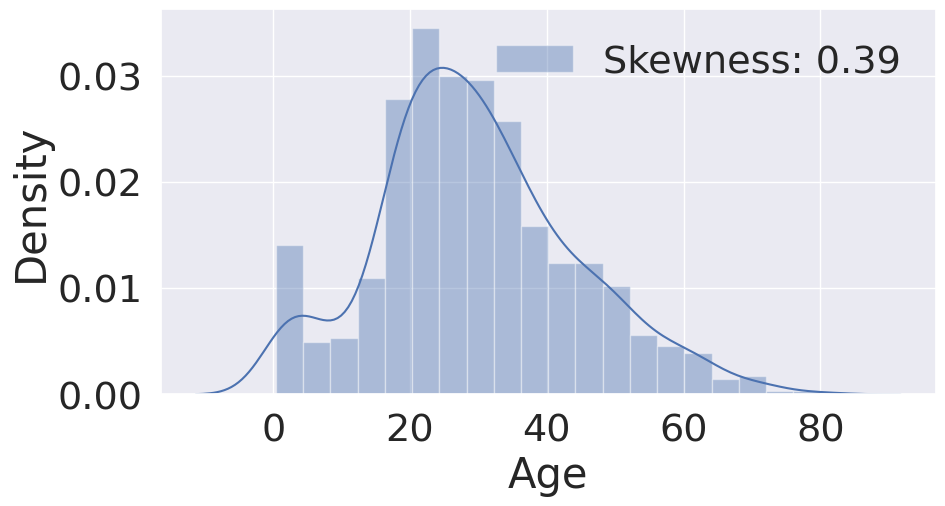

In [105]:
plt.figure(figsize = (10, 5))
age_hist = sns.distplot(df_train['Age'], label = 'Skewness: {:.2f}'.format(df_train['Age'].skew()))
age_hist = age_hist.legend(loc = 'best')

- **연속형 변수인 Age의 분포**를 확인해보니, **약간의 치우침**이 보인다.
- 나중에 Feature Engineering 과정에서 **Null 값이 존재해서 치우친 분포가 나온 것인지 확인**하고, **로그 변환** 수행 여부를 결정할 것이다.

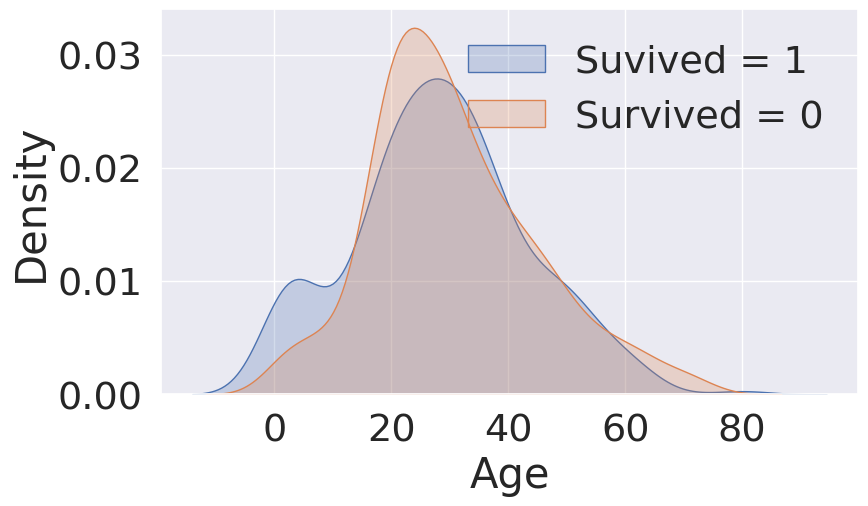

In [111]:
plt.figure(figsize = (9, 5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], shade = True)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], shade = True)

plt.legend(['Suvived = 1', 'Survived = 0'])
plt.show()

- 20 ~ 30대의 생존자들이 많은 것을 알 수 있다.

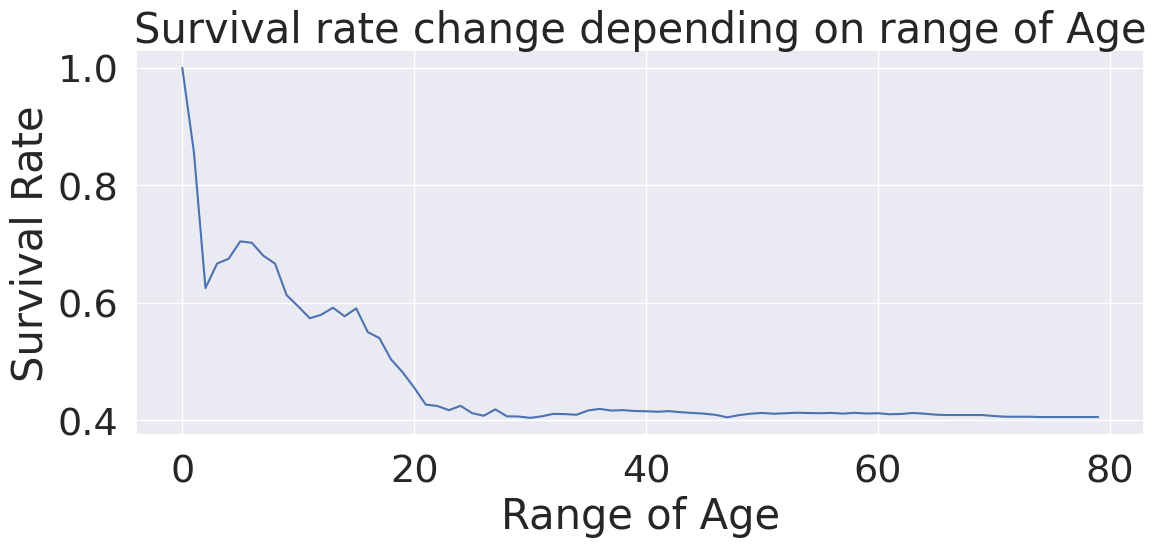

In [112]:
cummulate_survival_ratio = []

for i in range(1, 81):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize = (13, 5))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age')
plt.xlabel('Range of Age')
plt.ylabel('Survival Rate')
plt.show()

-Age의 범위에 따른 생존 확률을 구해보니, 젊은 연령대에서의 생존률이 높았고 연령대가 높아질수록 생존률이 급격히 낮아짐을 알 수 있다.
-이러한 결과가 나온 것으로 보아, **Age 변수는 target 변수를 예측하는데 중요한 feature**라고 생각할 수 있겠다.

### 추가적으로 Pclass별 Age의 분포를 확인

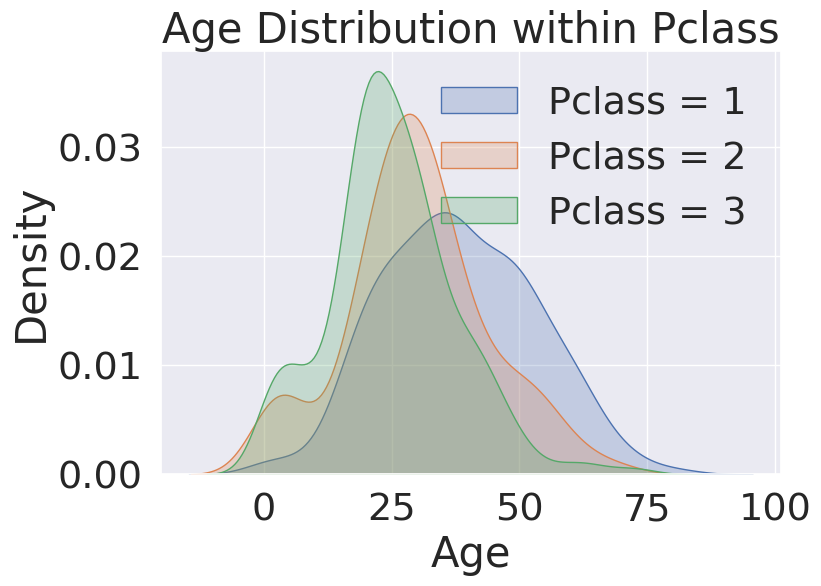

In [113]:
sns.kdeplot(df_train[df_train['Pclass'] == 1]['Age'], shade = True)
sns.kdeplot(df_train[df_train['Pclass'] == 2]['Age'], shade = True)
sns.kdeplot(df_train[df_train['Pclass'] == 3]['Age'], shade = True)

plt.title('Age Distribution within Pclass')
plt.legend(['Pclass = 1', 'Pclass = 2', 'Pclass = 3'])
plt.show()

- Pclass가 높을수록(1st) 나이 많은 탑승객들의 비중이 커진다.

# Pclass와 Age, Sex와 Age에 따른 생존률의 차이 확인

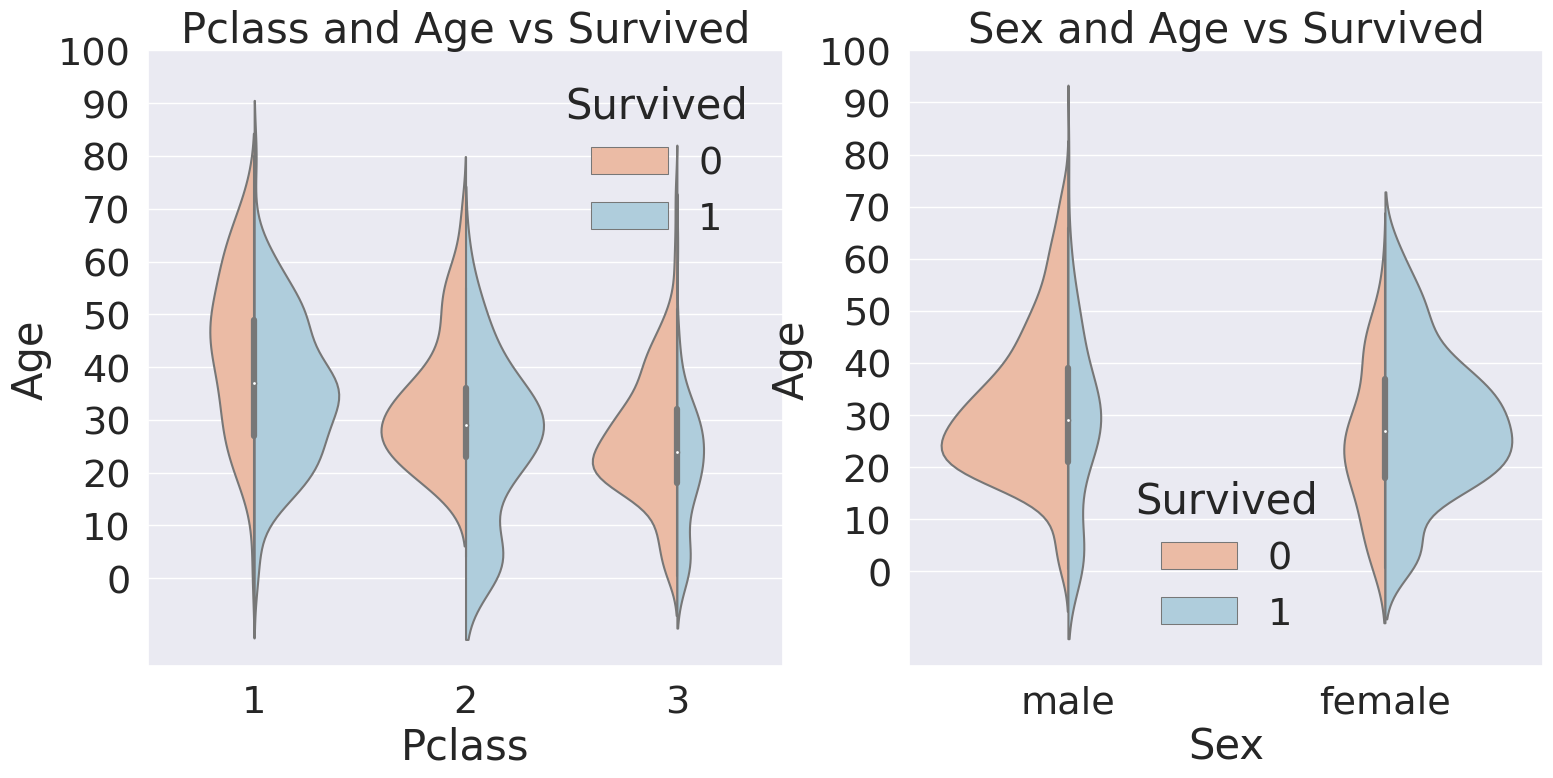

In [117]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
# violinplot got multiple values for argument 'data' 오류가 뜨면 x , y 축을 명확히 써줘야 충돌이 안 발생함
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, palette = 'RdBu', ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, palette = 'RdBu', ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

- 모든 Pclass에서 나이가 어릴수록 생존 확률이 높다.
- 또한 앞서 계속 언급했듯이, 여성의 생존 확률이 남성에 비해 월등히 높다.

# Embarked에 따른 생존률의 차이 확인

In [118]:
embarked_mean_survived = df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean()
embarked_mean_survived

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<Axes: xlabel='Embarked'>

<Figure size 700x700 with 0 Axes>

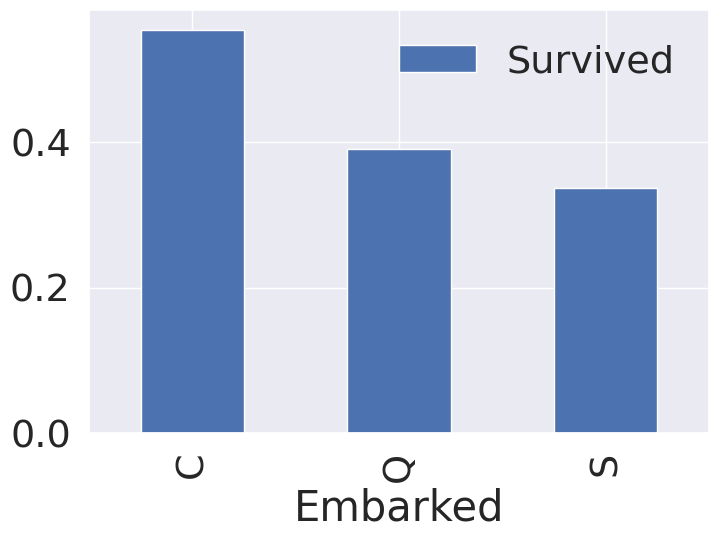

In [119]:
plt.figure(figsize = (7, 7))
embarked_mean_survived.sort_values(by = 'Survived', ascending = False).plot.bar()

- 탑승 항구가 "C"인 탑승객들의 생존률이 가장 높으며, "S"인 탑승객들의 생존률이 가장 낮다.
-  **Embarked 변수가 target 변수를 예측하는데 중요한 feature라고 생각하기엔 조금 애매**하다. 그래도 **일단 모델에는 포함**시킬 것이다.

### Embarked 변수와 다른 변수들을 비교
1. Embarked
2. Embarked vs Pclass
3. Embarked vs Sex
4. Embarked vs Survived

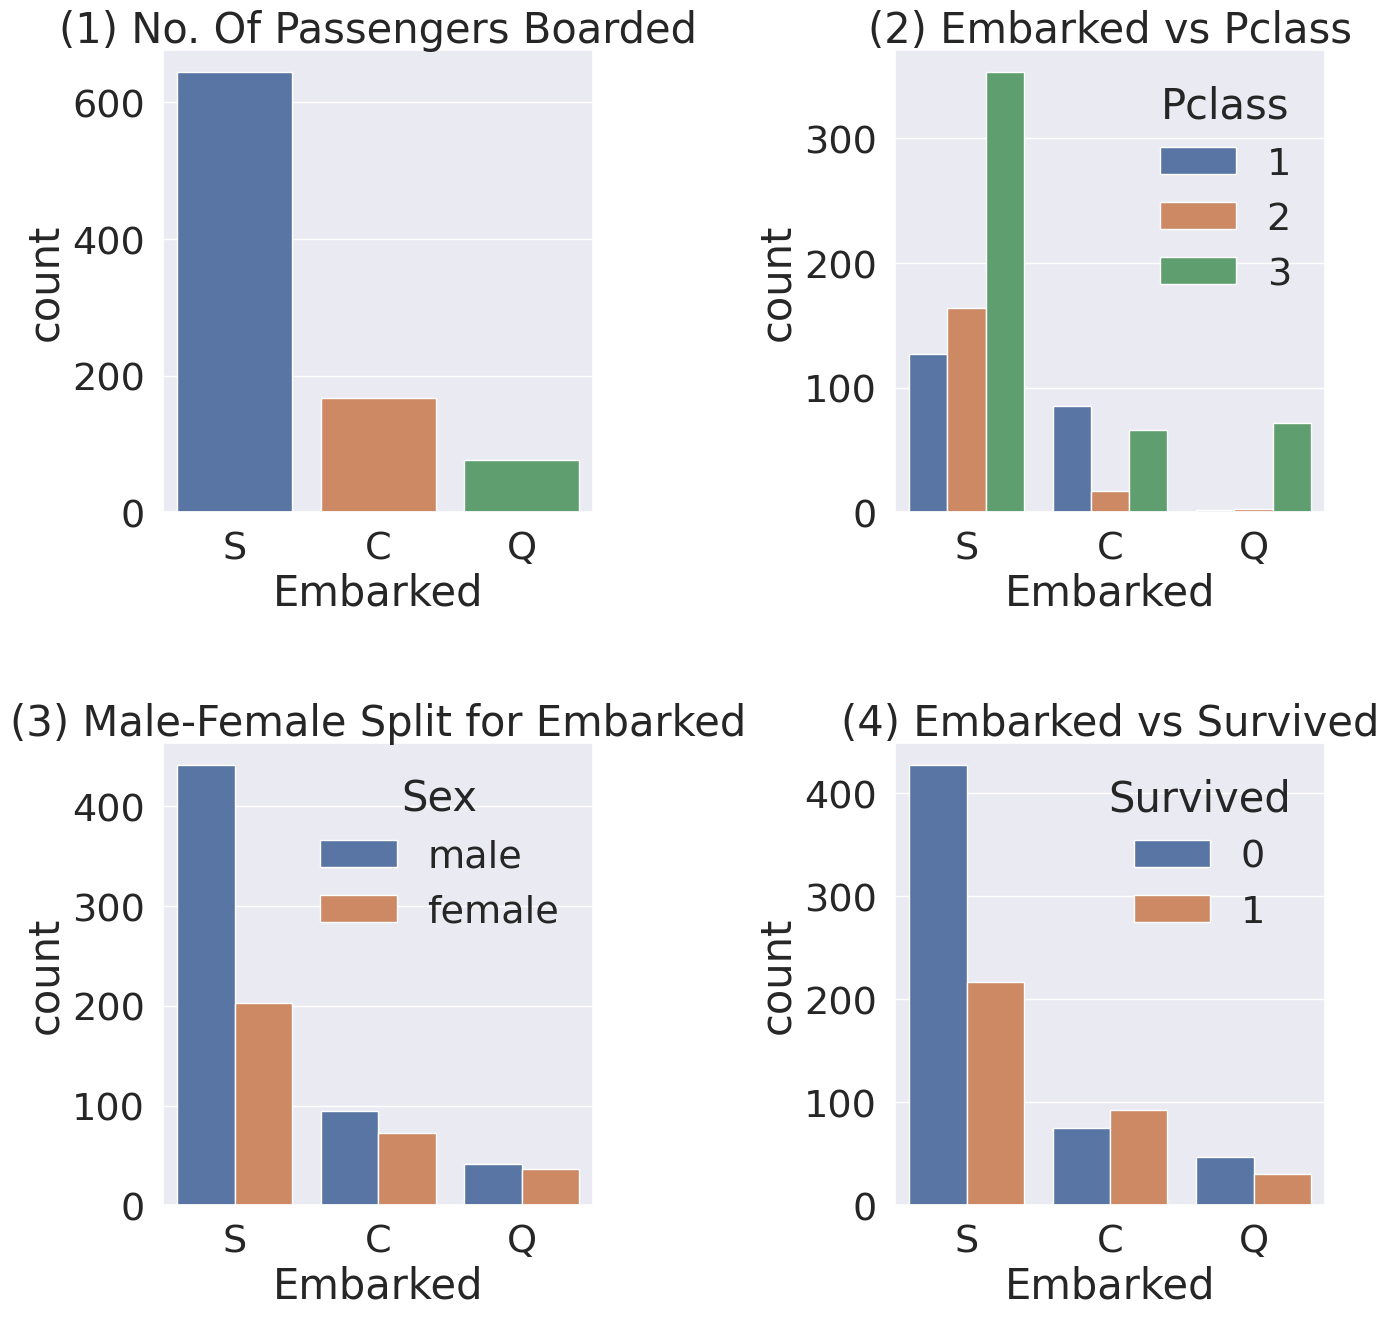

In [126]:
f, ax = plt.subplots(2, 2, figsize = (15, 15))

sns.countplot(x = df_train['Embarked'], data = df_train, ax = ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')

sns.countplot(x = df_train['Embarked'], hue = 'Pclass', data = df_train, ax = ax[0, 1])
ax[0, 1].set_title('(2) Embarked vs Pclass')

sns.countplot(x = df_train['Embarked'], hue = 'Sex', data = df_train, ax = ax[1, 0])
ax[1, 0].set_title('(3) Male-Female Split for Embarked')

sns.countplot(x = df_train['Embarked'], hue = 'Survived', data = df_train, ax = ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Survived')

plt.subplots_adjust(wspace = 0.7, hspace = 0.5) # 4개의 plot들이 겹치지 않도록 가로 및 세로 공간을 조정
plt.show()

- 전반적으로 탑승 항구가 "S"인 탑승객들이 많으며, 탑승 항구가 "S"인 탑승객들의 남녀 성비가 가장 많이 차이난다.
- 탑승 항구가 "C"인 사람들의 생존 확률이 높은 이유는 Pclass가 높은(1st) 사람들이 많기 때문이다.
- 반면 탑승 항구가 "S"인 사람들의 생존 확률이 낮은 이유는 Pclass가 낮은(3rd) 사람들이 많기 때문이다.

### SibSp와 Parch 변수를 하나의 변수(FamilySize)로 합친 후, FamilySize에 따른 생존률의 차이 확인

- SibSp(형제 자매) + Parch(부모, 자녀) = Family(가족)

In [122]:
# 자기 자신도 포함해주어야 하므로 '+ 1' 을 해준다
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

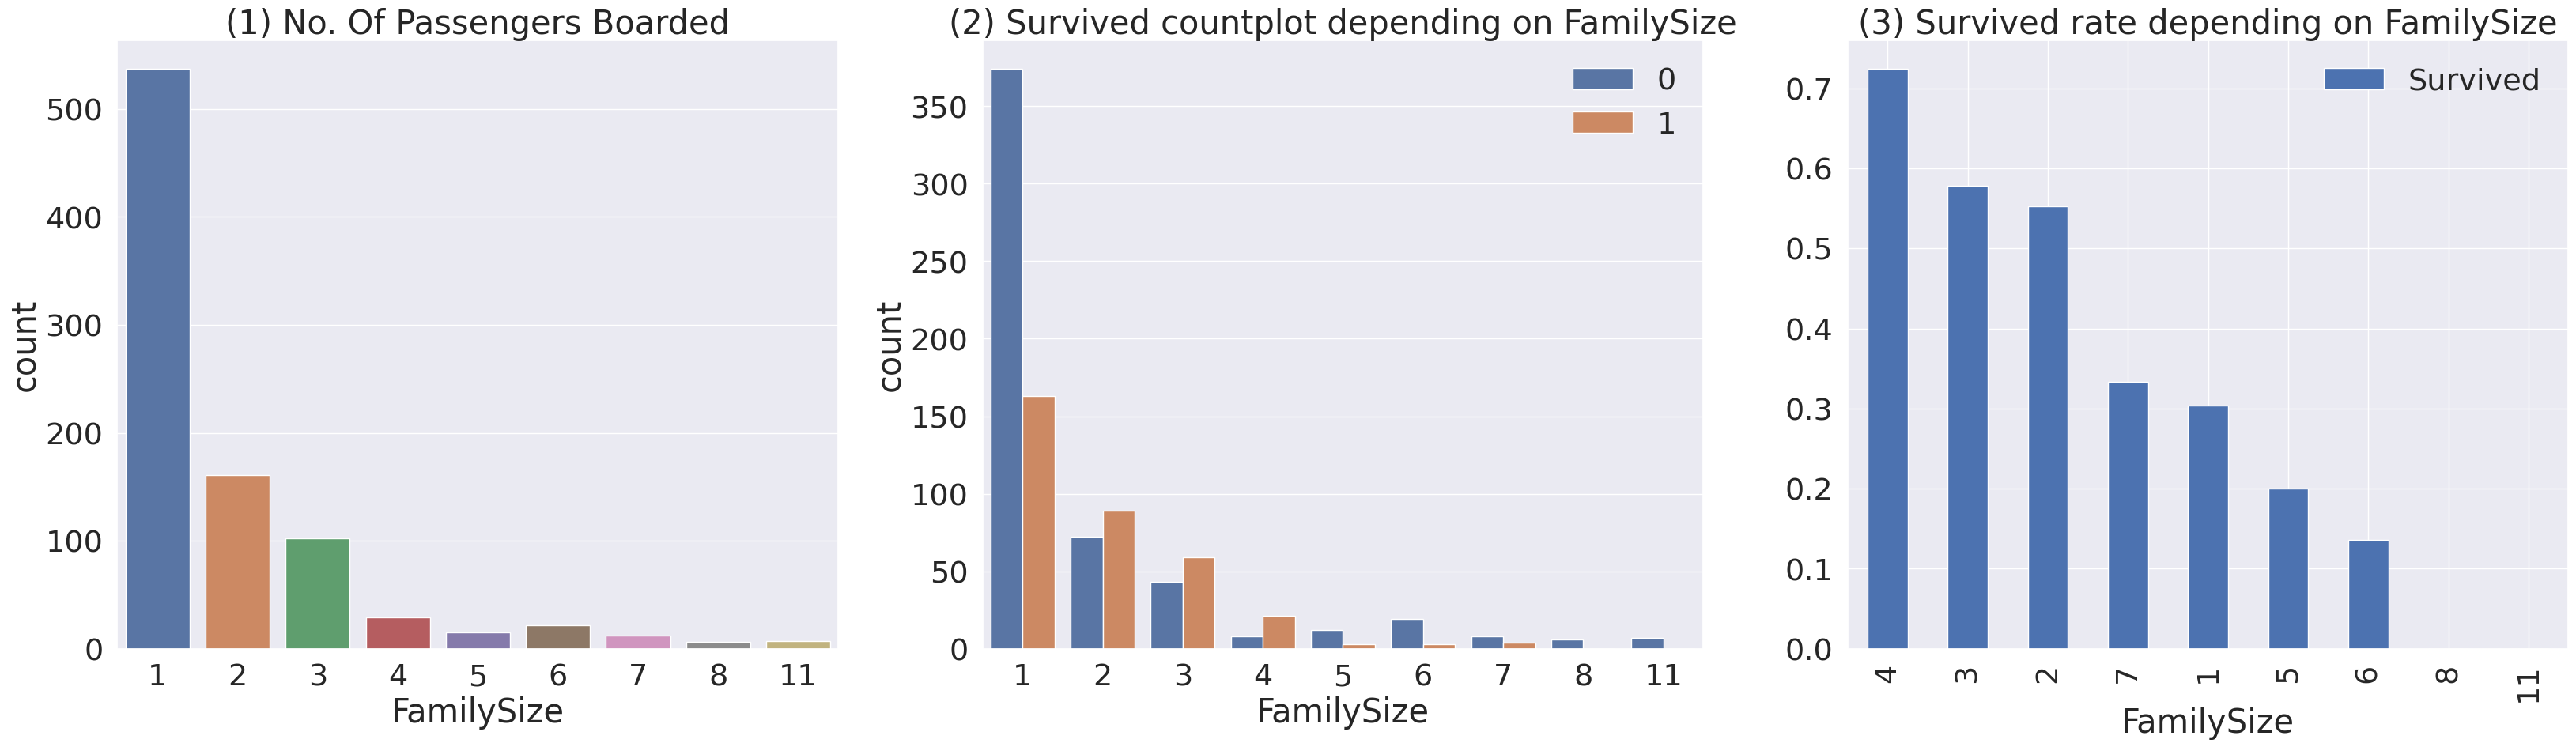

In [124]:
f, ax = plt.subplots(1, 3, figsize = (40, 10))

# FamilySize 변수의 분포 확인
sns.countplot(x = 'FamilySize', data = df_train, ax = ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded')

# FamilySize에 따른 생존률의 차이 확인
sns.countplot(x ='FamilySize', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize')
ax[1].legend(loc = 'upper right')

# FamilySize에 따른 생존률 확인
familysize_mean_survived = df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = True).mean()
familysize_mean_survived.sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize')
ax[2].legend(loc = 'upper right')

plt.show()

* Figure (1)
  * FamilySize가 1부터 11까지 존재함을 알 수 있다.
  * 대부분 1명(혼자)인 경우가 많다.
* *Figure (2), Figure (3)*
    * FamilySize에 따른 생존률 차이를 확인해보니, 가족이 4명인 경우가 가장 생존률이 높다. 그리고 가족 수가 3명, 2명인 경우가 그 뒤를 이었다.
    * 일반적으로 가족 수가 3 ~ 4명인 경우의 생존 확률이 높은 것을 확인할 수 있다.
- 이러한 결과가 나온 것으로 보아, FamilySize 변수는 target 변수를 예측하는데 중요한 feature라고 생각할 수 있겠다.

# Fare에 따른 생존률의 차이 확인